In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [60]:
df = pd.read_csv("bol_sales.csv")
df.describe(); #get some summary statistics
#df['rating'].value_counts(); #get a simple table of this variable
df.head()

id  gender  income  distance_center  website_visits  pages_viewed  \
0  person_1  female    7065              4.6              30           105   
1  person_2  female   23028              9.8              23            81   
2  person_3  female  103377              9.2              11            38   
3  person_4  female    9815              3.2              16            54   
4  person_5  female   22646             10.1              21            78   

   time_social_media  spent_bol  
0                117       1232  
1                 70       1396  
2                 94       1240  
3                124        720  
4                119       1379

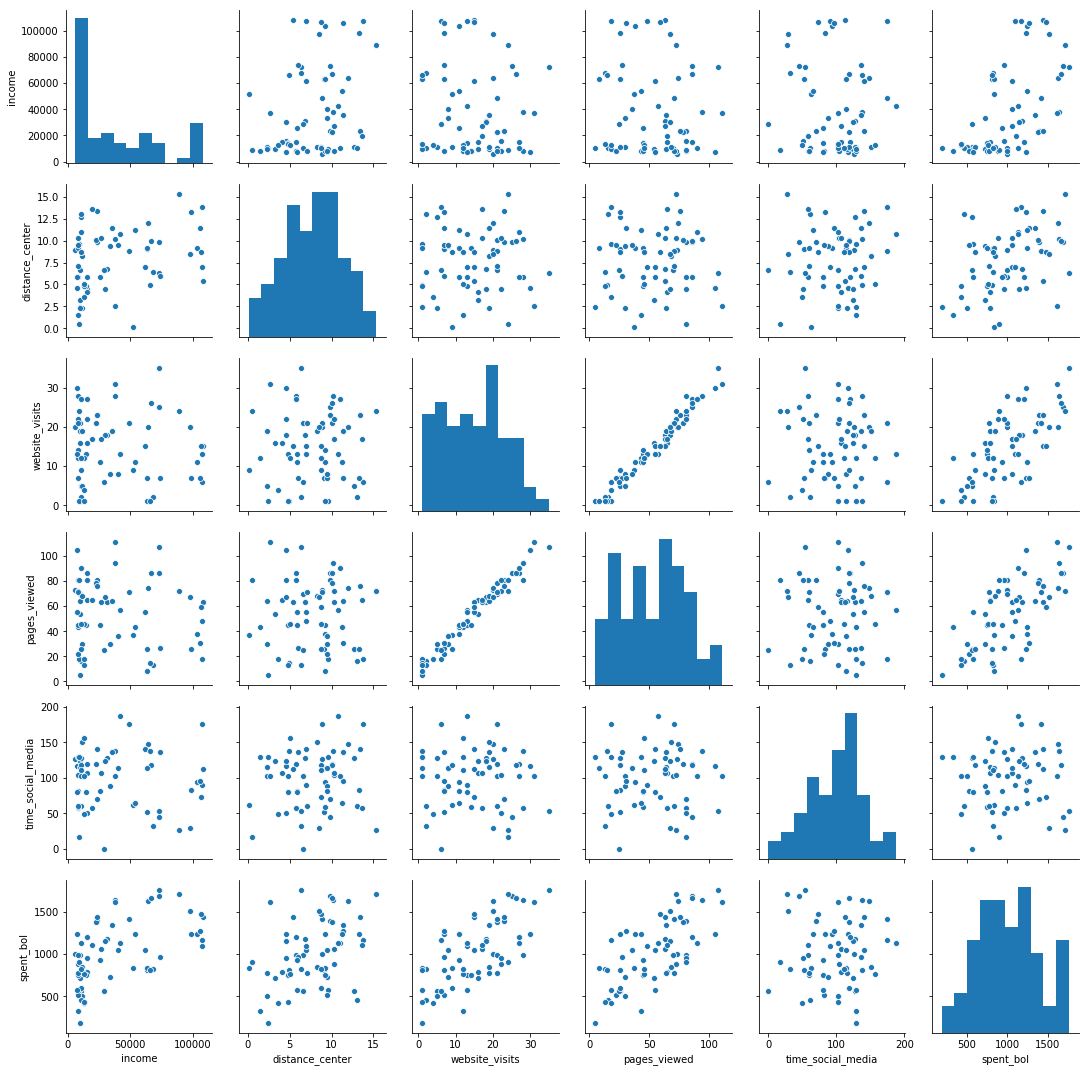

In [61]:
sns.pairplot(df)

In [62]:
#Creating dummy variables of qualitative variables
dummies = pd.get_dummies(df['gender'])
dummies.head()

female  male
0       1     0
1       1     0
2       1     0
3       1     0
4       1     0

In [63]:
#Adding dummies to the df by concatenating variables to dataframe
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=2 is rows)
df.head(1)

id  gender  income  distance_center  website_visits  pages_viewed  \
0  person_1  female    7065              4.6              30           105   

   time_social_media  spent_bol  female  male  
0                117       1232       1     0

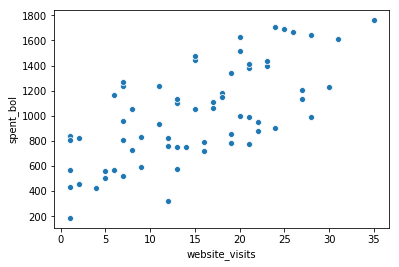

In [64]:
sns.scatterplot(x='website_visits', y='spent_bol', data=df)

In [113]:
from sklearn.linear_model import LinearRegression #the model
from sklearn.model_selection import train_test_split #the function to split the data

#Setting up the data and model
X = df[['pages_viewed', 'distance_center', 'income']] #selecting the variables to go into my X matrix
y = df['spent_bol'] #creating the y vector

#Split the data. test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data
#I'm using the subscript _l to indicate it's linear regression (using the same variable names in next block)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.3) #split the data and store it
# The following line would do the same but would generate the same split every time (use any number for random_state)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

lm = LinearRegression(); #create the lm object
lm.fit(X_train_l, y_train_l); #fit the model

119.21338813795728


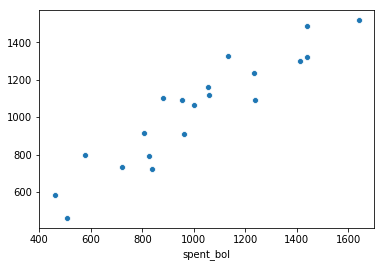

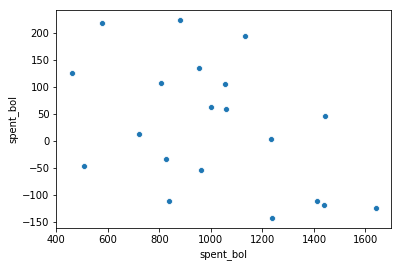

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_test_p = lm.predict(X_test_l) #get the predicted scores on the test set
resid = y_test_p - y_test_l #residuals of the test set

#RMSE: root mean square error: typical error the model makes
rmse = math.sqrt(mean_squared_error(y_test_l, y_test_p));
print(rmse)

#Plotting the results, again commented out
sns.scatterplot(y_test_l, y_test_p)
plt.show()#plotting the predicted scores against the actual scores
sns.scatterplot(y_test_l, resid) #plotting the residuals against the actual scores

In [115]:
df_h = pd.read_csv("bol_sales_holdout.csv")
df_h.describe(); #get some summary statistics

df_h.head()

id gender  income  distance_center  website_visits  pages_viewed  \
0  person_67   male   10813              4.8              10            41   
1  person_68   male   56724             13.2              12            52   
2  person_69   male   11476              9.0               2            16   
3  person_70   male   37781             11.4              15            56   
4  person_71   male   26179              9.4              14            50   

   time_social_media  
0                107  
1                  0  
2                120  
3                134  
4                 92

In [116]:
x = df_h[['pages_viewed','distance_center','income']]


df_h['predict_price'] = lm.predict(x)
#df_h['resid'] = df['views_p'] - df['views'] #get the residuals by subtracting the prediction from the actual views

In [117]:
df_h.head()

id gender  income  distance_center  website_visits  pages_viewed  \
0  person_67   male   10813              4.8              10            41   
1  person_68   male   56724             13.2              12            52   
2  person_69   male   11476              9.0               2            16   
3  person_70   male   37781             11.4              15            56   
4  person_71   male   26179              9.4              14            50   

   time_social_media  predict_price  
0                107     641.854888  
1                  0    1260.111424  
2                120     487.939864  
3                134    1140.004173  
4                 92     952.486613

In [118]:
rmse

119.21338813795728

In [119]:
df_ha = pd.read_csv('bol_sales_holdout_answers.csv')

In [120]:
df_ha

id  gender  income  distance_center  website_visits  pages_viewed  \
0   person_67    male   10813              4.8              10            41   
1   person_68    male   56724             13.2              12            52   
2   person_69    male   11476              9.0               2            16   
3   person_70    male   37781             11.4              15            56   
4   person_71    male   26179              9.4              14            50   
5   person_72  female   96452              2.9              17            52   
6   person_73  female    9952              3.2               3            20   
7   person_74  female    7857              6.0              11            37   
8   person_75    male   11600              4.2              14            49   
9   person_76  female   46561              7.0              15            56   
10  person_77  female   48673              4.8              19            58   
11  person_78  female    8998              8.2              13            59   
12  person_79  female   13750              4.8              21            78   
13  person_80  female    7104              6.1              15            54   
14  person_81  female  103572              3.9              27            79   
15  person_82    male   12902              4.3              20            77   
16  person_83  female   21950              0.6               5            25   
17  person_84  female   75990              5.0               8            33   
18  person_85  female   48782              1.2               5            21   
19  person_86    male   49590              7.3              22            72   
20  person_87    male    6079              8.7               9            44   
21  person_88  female    9955              6.2              23            73   
22  person_89    male   94516              6.6              29            96   
23  person_90    male   13301             14.4              25            86   
24  person_91    male   40962              7.1              22            73   
25  person_92    male   43781             10.9              18            60   
26  person_93  female   12326              8.1              13            48   
27  person_94  female   26405              8.8              20            61   
28  person_95    male    8557              7.6               9            43   
29  person_96    male   14343             11.4              16            63   
30  person_97  female   23952              6.7               9            41   
31  person_98    male   88587              0.3              11            36   
32  person_99    male   11548             10.0               1             2   

    time_social_media  spent_bol  
0                 107        470  
1                   0       1219  
2                 120        360  
3                 134       1091  
4                  92        879  
5                  87       1157  
6                 118        400  
7                 109        573  
8                  69        538  
9                  64       1206  
10                129       1135  
11                196        960  
12                109       1116  
13                 94        742  
14                 68       1466  
15                141        880  
16                145        545  
17                133       1013  
18                101        670  
19                101       1173  
20                117        520  
21                121        986  
22                124       1548  
23                103       1256  
24                 82       1143  
25                 82       1138  
26                 79        868  
27                 40       1154  
28                168        542  
29                 75        966  
30                169        912  
31                112        709  
32                 81        208

In [121]:
math.sqrt(mean_squared_error(df_ha['spent_bol'], df_h['predict_price']))

123.12272955257117